# Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality --> http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip

In [192]:
import pandas as pd
import numpy as np
import requests, zipfile, io
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Указываем ссылку на архив с датасетом 
r = requests.get('http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip')
print(r.status_code)

200


In [194]:
# Создаем соотвествующий объект
z = zipfile.ZipFile(io.BytesIO(r.content))
# Просматриваем архив и выбираем нужный файл
z.namelist()

['winequality/winequality-names.txt',
 'winequality/winequality-names.txt.bak',
 'winequality/winequality-red.csv',
 'winequality/winequality-white.csv']

In [195]:
#Открываем файл с красными винами
df_r = pd.read_csv(z.open('winequality/winequality-red.csv'), sep = ';')
df_r['type'] = 'red'
df_r.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1568,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,9.2,5,red
600,8.2,0.915,0.27,2.1,0.088,7.0,23.0,0.99620,3.26,0.47,10.0,4,red
1049,9.3,0.500,0.36,1.8,0.084,6.0,17.0,0.99704,3.27,0.77,10.8,6,red
1331,7.8,0.870,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,5,red
505,10.2,0.490,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5,7,red
282,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,5,red
723,7.1,0.310,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,5,red
61,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,9.3,5,red
1288,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5,red
601,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6,red


In [196]:
#Открываем файл с белыми винами и добавляем столбец с обозначением типа вина 'type' = 'white'
df_w = pd.read_csv(z.open('winequality/winequality-white.csv'), sep = ';')
df_w['type'] = 'white'
df_w.sample(n = 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3249,6.4,0.23,0.35,4.6,0.039,43.0,147.0,0.99216,3.18,0.40,11.0,7,white
1128,5.7,0.10,0.27,1.3,0.047,21.0,100.0,0.99280,3.27,0.46,9.5,5,white
1698,7.0,0.24,0.30,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,11.8,6,white
433,7.2,0.55,0.09,1.5,0.108,16.0,151.0,0.99380,3.07,0.57,9.2,4,white
310,6.1,0.36,0.27,2.1,0.035,16.0,100.0,0.99170,3.40,0.71,11.5,7,white
3583,7.7,0.24,0.30,1.4,0.041,15.0,102.0,0.99290,3.26,0.53,10.4,6,white
399,6.4,0.19,0.42,2.9,0.032,32.0,83.0,0.99080,3.30,0.41,11.7,6,white
1047,7.0,0.31,0.52,1.7,0.029,5.0,61.0,0.99180,3.07,0.43,10.4,5,white
4047,6.9,0.19,0.35,13.5,0.038,49.0,118.0,0.99546,3.00,0.63,10.7,6,white
2353,7.0,0.18,0.26,1.4,0.044,46.0,89.0,0.99256,3.39,0.48,10.7,7,white


In [197]:
#Склеиваем два датафрейма в один, используя pd.concat
df = pd.concat([df_r, df_w])
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
733,7.0,0.45,0.34,2.70,0.082,16.0,72.0,0.99800,3.55,0.60,9.5,5,red
385,7.4,0.63,0.07,2.40,0.090,11.0,37.0,0.99790,3.43,0.76,9.7,6,red
556,8.4,0.35,0.71,12.20,0.046,22.0,160.0,0.99820,2.98,0.65,9.4,5,white
2144,8.2,0.21,0.32,10.65,0.053,53.0,145.0,0.99720,3.17,0.48,10.2,6,white
3042,6.3,0.33,0.42,17.20,0.037,57.0,170.0,0.99884,3.26,0.57,9.4,6,white
1336,6.0,0.50,0.00,1.40,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5,red
267,5.3,0.58,0.07,6.90,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5,white
1277,7.6,0.31,0.29,10.50,0.040,21.0,145.0,0.99660,3.04,0.35,9.4,5,white
3606,6.4,0.38,0.24,7.20,0.047,41.0,151.0,0.99604,3.11,0.60,9.2,5,white
3717,6.3,0.18,0.24,3.40,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,white


# На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.

In [198]:
df['good'] = np.where(df['quality'] > 5, 1, 0)
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good
2910,6.1,0.37,0.20,7.60,0.031,49.0,170.0,0.99558,3.22,0.48,9.5,5,white,0
1050,7.3,0.24,0.34,7.50,0.048,29.0,152.0,0.99620,3.10,0.54,9.0,5,white,0
1249,7.1,0.60,0.01,2.30,0.079,24.0,37.0,0.99514,3.40,0.61,10.9,6,red,1
2996,6.5,0.35,0.36,0.80,0.034,32.0,111.0,0.98942,3.11,0.50,12.1,8,white,1
1483,8.1,0.33,0.44,1.50,0.042,6.0,12.0,0.99542,3.35,0.61,10.7,5,red,0
4866,5.7,0.41,0.21,1.90,0.048,30.0,112.0,0.99138,3.29,0.55,11.2,6,white,1
2030,9.5,0.42,0.41,2.30,0.034,22.0,145.0,0.99510,3.06,0.52,11.0,6,white,1
1519,6.6,0.70,0.08,2.60,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5,red,0
3985,6.8,0.11,0.27,8.60,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,1
2492,6.1,0.28,0.24,19.95,0.074,32.0,174.0,0.99922,3.19,0.44,9.3,6,white,1


# Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока. Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [199]:
# Выбор стиля оформления диаграмм
plt.style.use('classic')
# Готовим данные для графика в виде сводной таблицы
data1 = df.query('type == "red"')
data2 = df.query('type == "white"')


In [200]:
data1.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good
229,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5,red,0
970,10.4,0.26,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,6,red,1
925,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7,red,1
664,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5,red,0
1274,7.8,0.58,0.13,2.1,0.102,17.0,36.0,0.99440,3.24,0.53,11.2,6,red,1
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.1,5,red,0
1528,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6,red,1
516,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.9,6,red,1
179,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,5,red,0
786,9.9,0.35,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5,5,red,0


In [201]:
data2.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good
4764,5.9,0.26,0.29,5.4,0.046,34.0,116.0,0.99224,3.24,0.41,11.4,6,white,1
338,5.9,0.26,0.40,1.3,0.047,12.0,139.0,0.99450,3.45,0.53,10.4,5,white,0
2672,7.0,0.15,0.30,13.3,0.049,46.0,120.0,0.99704,3.20,0.36,9.5,7,white,1
2532,6.7,0.54,0.27,7.1,0.049,8.0,178.0,0.99502,3.16,0.38,9.4,4,white,0
4194,6.7,0.20,0.24,6.5,0.044,28.0,100.0,0.99348,3.12,0.33,10.2,6,white,1
3246,6.8,0.22,0.41,6.7,0.034,39.0,116.0,0.99245,3.18,0.46,11.5,6,white,1
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0,5,white,0
1851,6.1,0.34,0.46,4.7,0.029,21.0,94.0,0.99100,3.29,0.62,12.3,6,white,1
1546,6.7,0.29,0.49,4.7,0.034,35.0,156.0,0.99450,3.13,0.45,9.9,6,white,1
2639,9.2,0.14,0.37,1.1,0.034,36.0,84.0,0.99136,3.05,0.55,11.6,6,white,1


# Определим процентное соотношение хороших и НЕхороших вин в данной выборке

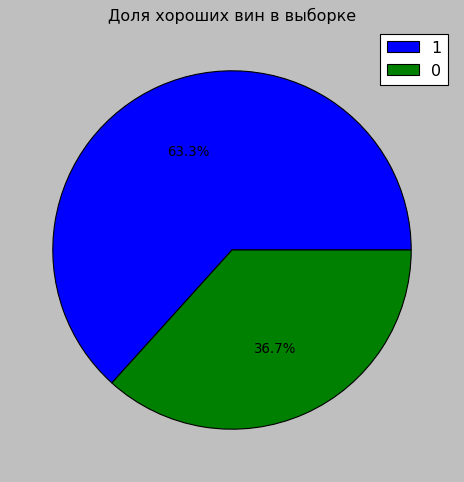

In [250]:
# Готовим данные для графика
data = df['good'].value_counts()
data.head()

# Строим круговую диаграмму

plt.figure(figsize = (10,7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля хороших вин в выборке')
plt.legend(data.index)

plt.show()

# Хороших вин в выборке больше - 63.3%

# Определим корреляционную зависимость качества вина от его различных характеристик, чтобы более целенаправленно проводить анализ:

In [202]:
# Строим корреляциогнную матрицу для красного вина
correlation_r = df.query('type == "red"').corr()
correlation_r
# Строим корреляциогнную матрицу для белого вина
correlation_w = df.query('type == "white"').corr()
correlation_w


C:\Users\strongegun\AppData\Local\Temp\ipykernel_20976\3302954364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_r = df.query('type == "red"').corr()
C:\Users\strongegun\AppData\Local\Temp\ipykernel_20976\3302954364.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_w = df.query('type == "white"').corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,0.051858


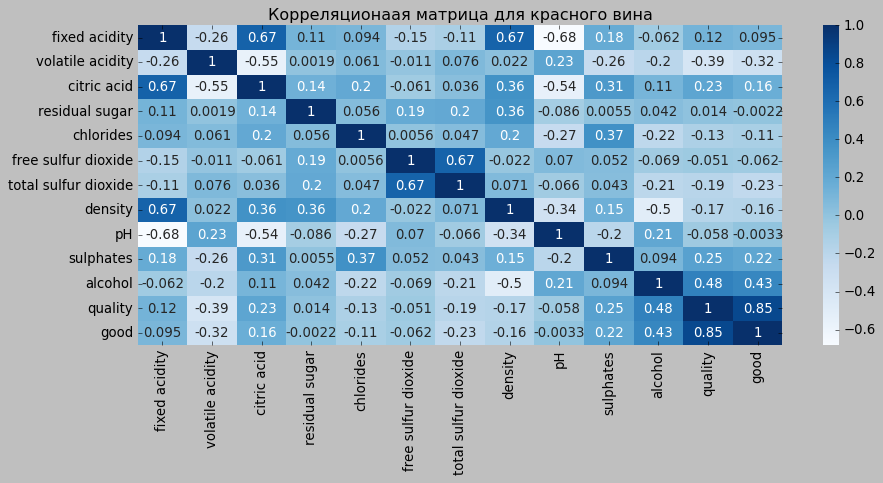

In [238]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (13,5))
sns.heatmap(correlation_r, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица для красного вина')
plt.show()

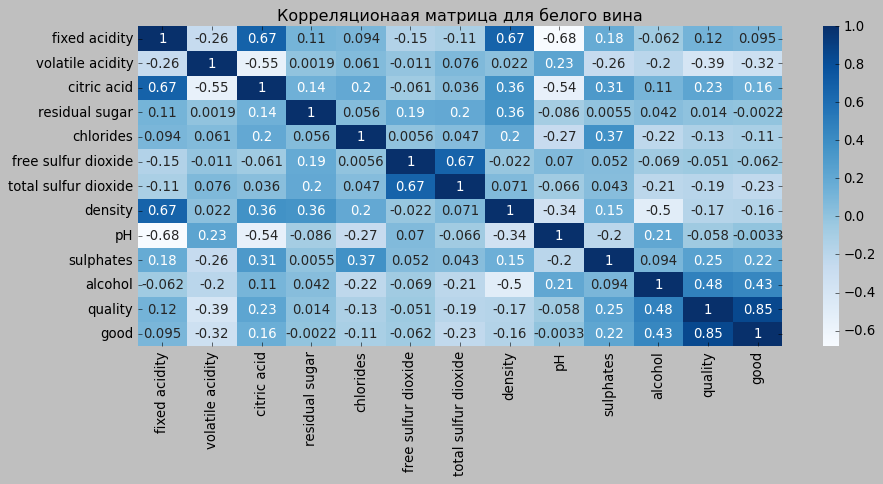

In [204]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (13,5))
sns.heatmap(correlation_r, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица для белого вина')
plt.show()

# Из двух корреляционных диаграм приведенных выше, видно, что наибольшей корреляцией к качеству вина обладают такие характеристики, как: содержание алкоголя (0.43), летучая кислотность (-0.32), содержание сульфатов (0.22) и содержание лимонной кислоты (0.23). 

# Однако, как показывают коэффициэнты корреляции, корреляционная взаимосвязь выражена не очень сильно.

# Определим, с каким содержанием алкоголя хороших вин больше:

In [205]:
data_alc1 = data1.query('good == 1').groupby('alcohol')['fixed acidity'].agg(count = 'count').reset_index()
data_alc1.head()

,alcohol,count
0,8.4,1
1,8.7,2
2,9.0,16
3,9.1,7
4,9.2,19


In [206]:
data_alc2 = data2.query('good == 1').groupby('alcohol')['fixed acidity'].agg(count = 'count').reset_index()
data_alc2.head()

,alcohol,count
0,8.5,5
1,8.6,5
2,8.7,30
3,8.8,51
4,8.9,55


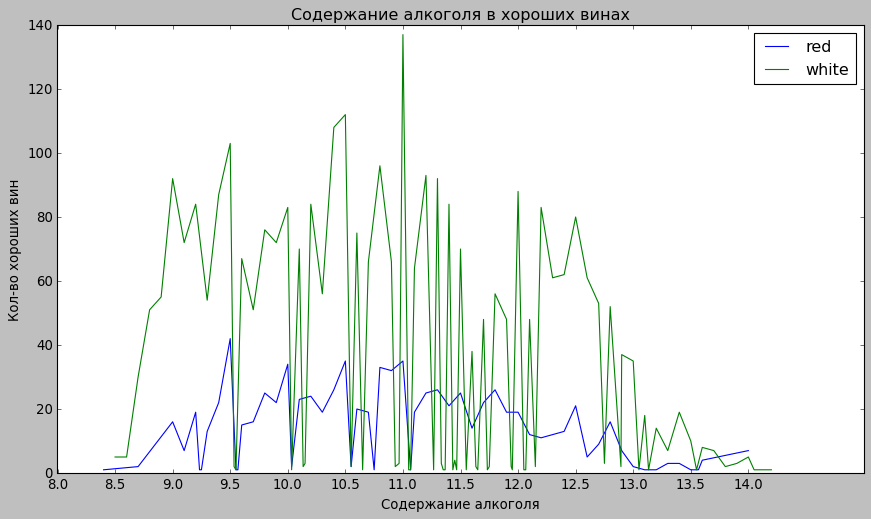

In [208]:
# Строим линейную диаграмму в разрезе содержания алкоголя
plt.figure(figsize = (13,7))

plt.plot(data_alc1['alcohol'], data_alc1['count'])
plt.plot(data_alc2['alcohol'], data_alc2['count'])
plt.xticks(np.arange(8, 14.5, 0.5))

plt.title('Содержание алкоголя в хороших винах')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Кол-во хороших вин')
plt.legend(['red', 'white'])

plt.show()

# Линейная диаграмма выше показывает, что зависимость качества вина от содержания алкоголя несет нелинейный характер. Можно заметить, что наибольшее количество хороших красных вин приходится на 9.5% (самый высоких показатель), 10.0%, 10.5% и 11.0%. Наибольшее количество хороших белых вин приходится на 9.5%, 10.5%, 11.0%(самый высоких показатель). Таким образом, можно предположить, что, выбирая красное вино, стоит обращать внимание на вина с 9.5% алкоголя, а выбирая белое - на вина с 11.0% алкоголя.

# Далее, посмотрим, как меняется содержание сульфатов в хороших и НЕхороших винах:

In [215]:
# Готовим данные с хоршими винами
df1 = df.query('good == 1')
df1.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good
2478,6.3,0.270,0.37,7.9,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,6,white,1
2171,7.4,0.190,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white,1
601,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6,red,1
969,5.5,0.420,0.09,1.6,0.019,18.0,68.0,0.99060,3.33,0.51,11.4,7,white,1
2175,7.4,0.190,0.30,12.8,0.053,48.5,212.0,0.99860,3.14,0.49,9.1,7,white,1
974,8.8,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,7,red,1
4462,7.1,0.420,0.20,2.8,0.038,28.0,109.0,0.98968,3.23,0.47,13.4,6,white,1
747,7.2,0.290,0.40,7.6,0.024,56.0,177.0,0.99280,3.04,0.32,11.5,6,white,1
4310,5.6,0.225,0.24,9.8,0.054,59.0,140.0,0.99545,3.17,0.39,10.2,6,white,1
1445,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.6,6,red,1


In [218]:
# Готовим данные с НЕхоршими винами
df2 = df.query('good == 0')
df2.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,good
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,white,0
2256,7.1,0.140,0.35,1.40,0.039,24.0,128.0,0.99212,2.97,0.68,10.4,5,white,0
1344,11.5,0.420,0.48,2.60,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,5,red,0
2576,6.5,0.270,0.40,10.00,0.039,74.0,227.0,0.99582,3.18,0.50,9.4,5,white,0
4839,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,4,white,0
1132,6.8,0.390,0.31,14.35,0.043,28.0,162.0,0.99880,3.17,0.54,9.1,5,white,0
1757,6.9,0.290,0.23,8.60,0.056,56.0,215.0,0.99670,3.17,0.44,8.8,5,white,0
210,5.6,0.245,0.25,9.70,0.032,12.0,68.0,0.99400,3.31,0.34,10.5,5,white,0
562,9.0,0.540,0.49,2.90,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,5,red,0
158,7.1,0.680,0.00,2.20,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,5,red,0


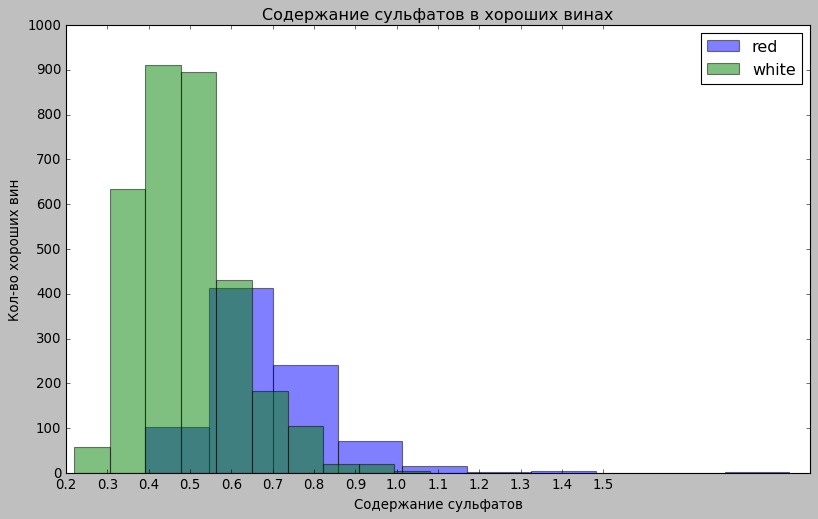

In [237]:
# Строим гистограмму в разрезе содержания сульфатов в ХОРОШИХ винах
plt.figure(figsize = (12,7))

plt.hist(df1.query('type == "red"')['sulphates'], alpha = 0.5, label = "red")
plt.hist(df1.query('type == "white"')['sulphates'], alpha = 0.5, label = "white")
plt.xticks(np.arange(0.2, 1.6, 0.1))
plt.yticks(np.arange(0, 1100, 100))

plt.title('Содержание сульфатов в хороших винах')
plt.xlabel('Содержание сульфатов')
plt.ylabel('Кол-во хороших вин')
plt.legend()

plt.show()

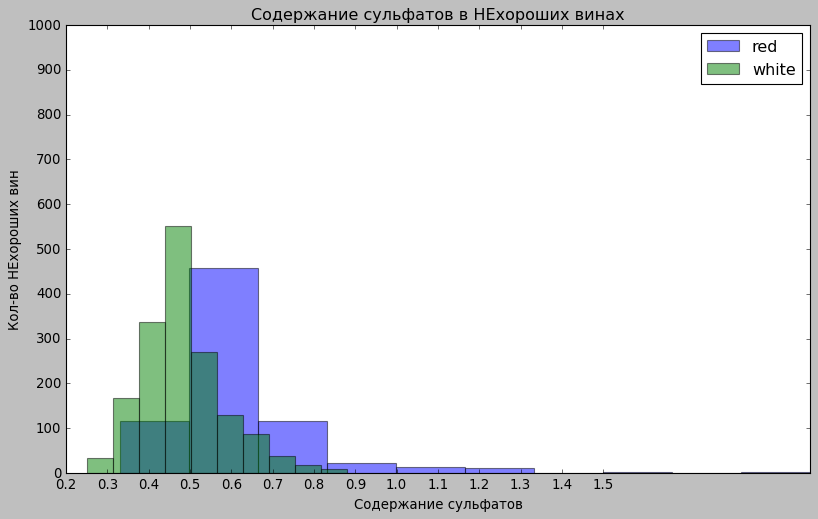

In [236]:
# Строим гистограмму в разрезе содержания сульфатов в НЕхороших винах
plt.figure(figsize = (12,7))

plt.hist(df2.query('type == "red"')['sulphates'], alpha = 0.5, label = "red")
plt.hist(df2.query('type == "white"')['sulphates'], alpha = 0.5, label = "white")
plt.xticks(np.arange(0.2, 1.6, 0.1))
plt.yticks(np.arange(0, 1100, 100))

plt.title('Содержание сульфатов в НЕхороших винах')
plt.xlabel('Содержание сульфатов')
plt.ylabel('Кол-во НЕхороших вин')
plt.legend()

plt.show()

# Посмторим разброс значений качества и летучей кислотности вин:

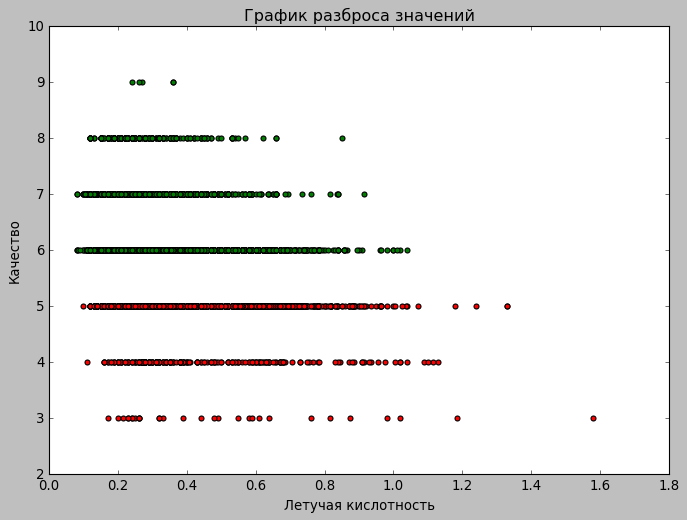

In [227]:
plt.figure(figsize = (10,7))

plt.scatter(df1['volatile acidity'], df1['quality'], c ='green')
plt.scatter(df2['volatile acidity'], df2['quality'], c ='red')

plt.title('График разброса значений')
plt.xlabel('Летучая кислотность')
plt.ylabel('Качество')

plt.show()

# Результаты выше указывают на то, что хорошие вина (качество >5) имеют более узкий разброс и в целом низкий уровень летучей кислотности, т.е. 0.2 - 0.4 для самых качественных вин (качество = 9). С понижением качества вина, пределы летучей кислотности растут. 

# Определим, разброс значений качества и содержания лимонной кислоты вин:

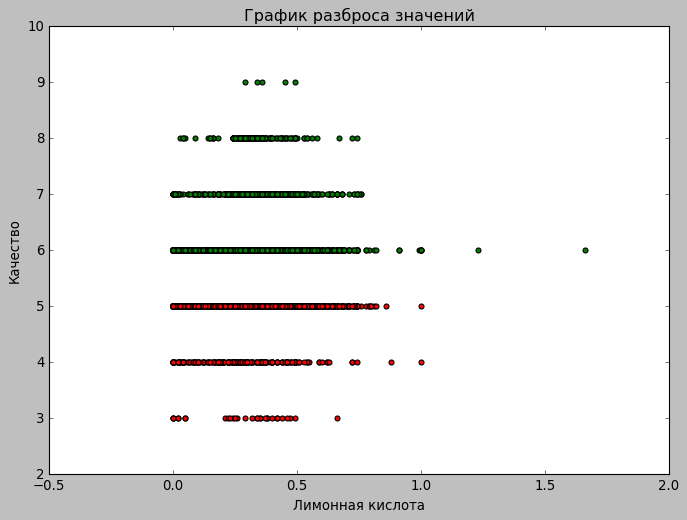

In [239]:
plt.figure(figsize = (10,7))

plt.scatter(df1['citric acid'], df1['quality'], c ='green')
plt.scatter(df2['citric acid'], df2['quality'], c ='red')

plt.title('График разброса значений')
plt.xlabel('Лимонная кислота')
plt.ylabel('Качество')

plt.show()

# Результаты выше указывают на то, что только самые качественные вина (качество = 9) выделяются узким разбросом содержания лимонной кислоты (0.15-0.5). С понижением качества вина, разброс по содержанию димонной кислоты растет (0.0 - 1.0).